In [19]:
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from numpy import save
from numpy import asarray
from os import listdir
from numpy import load
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import random

In [8]:
local_zip="cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
base_dir='/tmp/cats_and_dogs_filtered/'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cat_dir=train_dir+'/'+'cats'
train_dog_dir=train_dir+'/'+'dogs'
validation_cats_dir=validation_dir+'/'+'cats'
validation_dogs_dir=validation_dir+'/'+'dogs'

In [10]:
train_cat_frames=os.listdir(train_cat_dir)
train_dog_frames=os.listdir(train_dog_dir)
print(train_cat_dir)
print(train_dog_dir)
print(train_cat_frames)
print(train_dog_frames)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', '

In [76]:
print("total length of cat training set "+str(len(train_cat_frames)))
print("total length of dog training set "+str(len(train_dog_frames)))
print("total lenght of dog validation set "+str(len(validation_cats_dir)))
print("total length of cat validation set "+str(len(validation_dogs_dir)))

total length of cat training set 1000
total length of dog training set 1000
total lenght of dog validation set 43
total length of cat validation set 43


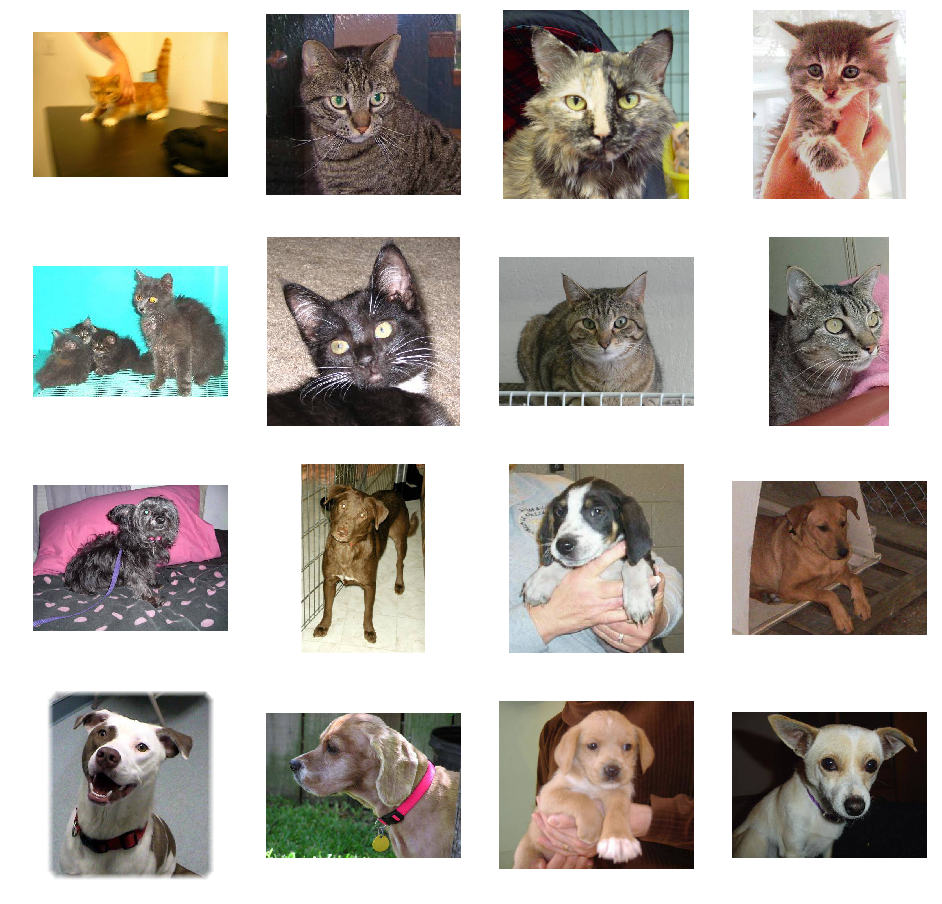

In [77]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows=4
ncols=4
pic_index=0
batch_size=8
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=batch_size
next_cat_pix=[os.path.join(train_cat_dir,fname) for fname in train_cat_frames[pic_index-batch_size:pic_index]]
next_dog_pix=[os.path.join(train_dog_dir,fname) for fname in train_dog_frames[pic_index-batch_size:pic_index]]
for i,img_path in enumerate(next_cat_pix+next_dog_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [79]:
print(tf.__version__)

2.1.0


In [91]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [92]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [83]:
print(train_cat_dir)

/tmp/cats_and_dogs_filtered/train/cats


In [86]:
#for training 
# other method is using ImageDataGenerator
photos=[]
labels=[]
for fname in listdir(train_cat_dir):
    pic=load_img(train_cat_dir+'/'+fname,target_size=(150,150))
    imgarray=img_to_array(pic)
    photos.append(imgarray)
    labels.append(1)
for fname in listdir(train_dog_dir):
    pic=load_img(train_dog_dir+'/'+fname,target_size=(150,150))
    imgarray=img_to_array(pic)
    photos.append(imgarray)
    labels.append(0)
photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('dogs_vs_cats_photos_train.npy',photos)
save('dogs_vs_cats_photos_train_labels.npy',labels)

(2000, 150, 150, 3) (2000,)


In [88]:
photos=load('dogs_vs_cats_photos_train.npy')
labels=load('dogs_vs_cats_photos_train_labels.npy')

In [89]:
print(photos.shape,labels.shape)

(2000, 150, 150, 3) (2000,)


In [93]:
history=model.fit(photos,labels,epochs=15,batch_size=32)

Train on 2000 samples
Epoch 1/15
2000/2000 [==============================] - 41s 20ms/sample - loss: 81.8426 - acc: 0.5410
Epoch 2/15
2000/2000 [==============================] - 45s 22ms/sample - loss: 0.9695 - acc: 0.6505
Epoch 3/15
2000/2000 [==============================] - 47s 24ms/sample - loss: 1.3195 - acc: 0.6730
Epoch 4/15
2000/2000 [==============================] - 45s 23ms/sample - loss: 1.3053 - acc: 0.5790
Epoch 5/15
2000/2000 [==============================] - 51s 25ms/sample - loss: 1.1948 - acc: 0.6740
Epoch 6/15
2000/2000 [==============================] - 48s 24ms/sample - loss: 1.2268 - acc: 0.7340
Epoch 7/15
2000/2000 [==============================] - 46s 23ms/sample - loss: 0.7028 - acc: 0.8000
Epoch 8/15
2000/2000 [==============================] - 47s 24ms/sample - loss: 0.9793 - acc: 0.8520
Epoch 9/15
2000/2000 [==============================] - 51s 25ms/sample - loss: 0.2650 - acc: 0.9090
Epoch 10/15
2000/2000 [==============================] - 50s 25ms/sa

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [99]:
print('\n history dict:',history.history)


 history dict: {'loss': [81.8426098356247, 0.9694975299835205, 1.3194679713249207, 1.3053187637329102, 1.1947840433120727, 1.2267668297290801, 0.7027757532596588, 0.9793126364946365, 0.26497912311553956, 1.3406727650463581, 0.22598646891117097, 1.6297976967468857, 0.7682647374309599, 2.0562921545132995, 1.11361057168548], 'acc': [0.541, 0.6505, 0.673, 0.579, 0.674, 0.734, 0.8, 0.852, 0.909, 0.877, 0.952, 0.9405, 0.962, 0.9455, 0.9585]}


In [101]:
!mkdir saved_models

In [103]:
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


In [7]:
new_model = tf.keras.models.load_model('model1')
new_model.summary().

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [11]:
#validation
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [14]:
photos_val=[]
labels_val=[]
for filename in listdir(validation_cats_dir):
    pic=load_img(validation_cats_dir+'/'+filename,target_size=(150,150))
    imgarray=img_to_array(pic)
    labels_val.append(1)
    photos_val.append(imgarray)
for filename in listdir(validation_dogs_dir):
    pic=load_img(validation_dogs_dir+'/'+filename,target_size=(150,150))
    imgarray=img_to_array(pic)
    labels_val.append(0)
    photos_val.append(imgarray)
photos_val=asarray(photos_val)
labels_val=asarray(labels_val)
print(photos_val.shape)
print(labels_val.shape)

(1000, 150, 150, 3)
(1000,)


In [24]:
save('dogs_vs_cats_validation.npy',photos_val)
save('dogs_vs_cats_validation_labels.npy',labels_val)

In [25]:
photos=load('dogs_vs_cats_validation.npy')
labels=load('dogs_vs_cats_validation_labels.npy')

In [26]:
loss,accuracy=new_model.evaluate(photos,labels,verbose=2)
print("Model Accuracy:{:5.2f}%".format(accuracy*100))

1000/1000 - 6s - loss: 2.0552 - acc: 0.6050
Model Accuracy:60.50%


In [13]:
#Extracting Features Using Keras ImageDataGenerator and training it
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255) #Feature Scaling to [0-1] range
validation_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
train_dir,batch_size=16,class_mode='binary',target_size=(150,150))
validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=16,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [15]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=15,validation_steps=50,verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 50 steps
Epoch 1/15
125/125 - 40s - loss: 0.7533 - acc: 0.5495 - val_loss: 0.7678 - val_acc: 0.5100
Epoch 2/15
125/125 - 39s - loss: 0.6595 - acc: 0.6630 - val_loss: 0.6376 - val_acc: 0.6363
Epoch 3/15
125/125 - 39s - loss: 0.5470 - acc: 0.7440 - val_loss: 0.5651 - val_acc: 0.7113
Epoch 4/15
125/125 - 38s - loss: 0.4771 - acc: 0.7845 - val_loss: 0.5817 - val_acc: 0.7138
Epoch 5/15
125/125 - 39s - loss: 0.3770 - acc: 0.8250 - val_loss: 0.6723 - val_acc: 0.6988
Epoch 6/15
125/125 - 39s - loss: 0.3080 - acc: 0.8645 - val_loss: 0.7628 - val_acc: 0.7025
Epoch 7/15
125/125 - 39s - loss: 0.2157 - acc: 0.9160 - val_loss: 0.8471 - val_acc: 0.6900
Epoch 8/15
125/125 - 45s - loss: 0.1486 - acc: 0.9430 - val_loss: 0.9040 - val_acc: 0.7175
Epoch 9/15
125/125 - 42s - loss: 0.1097 - acc: 0.9580 - val_loss: 1.0121 - val_acc: 0.7013
Epoch 10/15


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [17]:
model.save('model2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model2\assets


In [18]:
new_model2=tf.keras.models.load_model('model2')
new_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


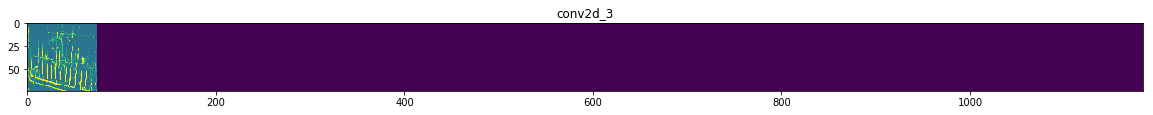

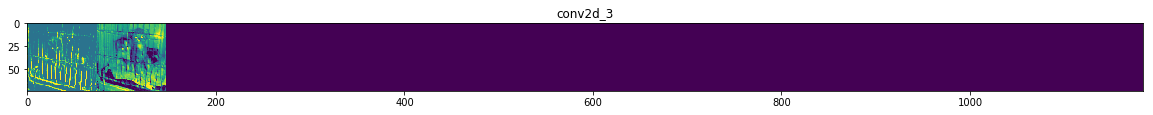

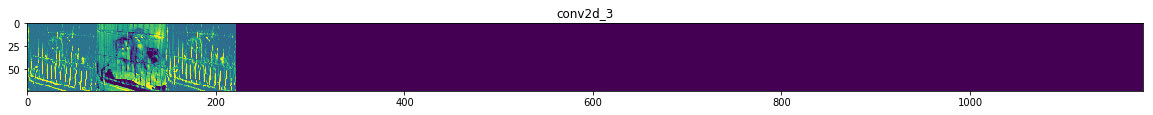

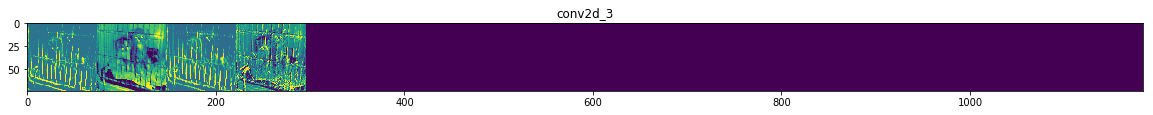

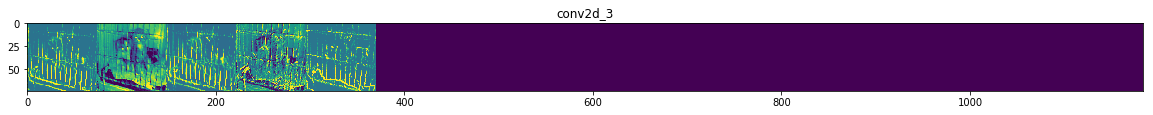

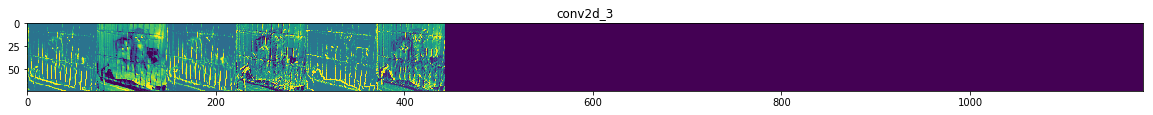

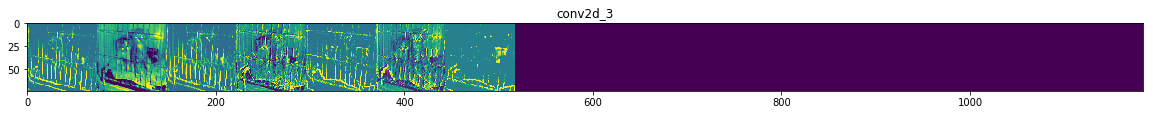

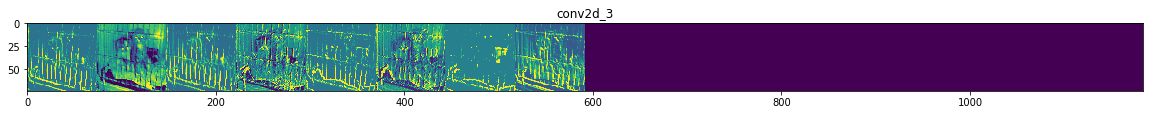

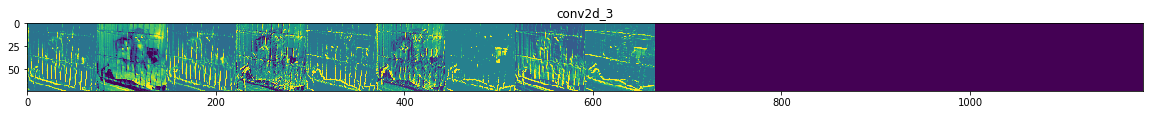

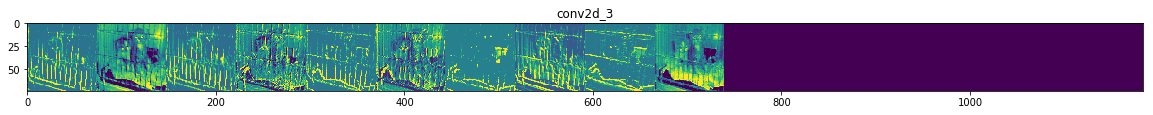

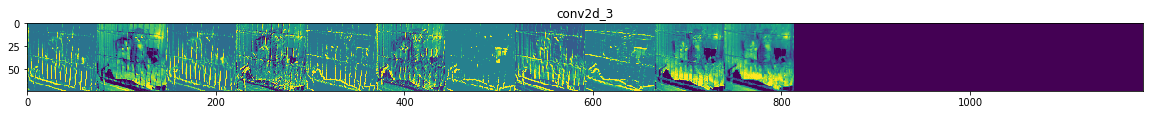

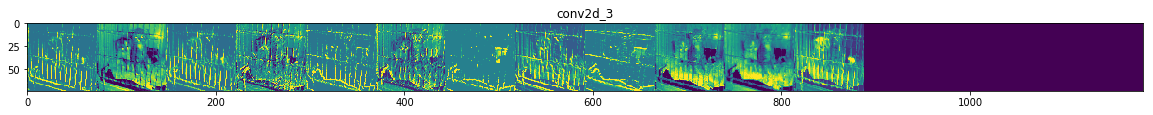

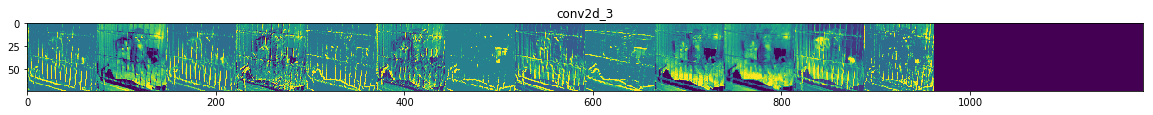

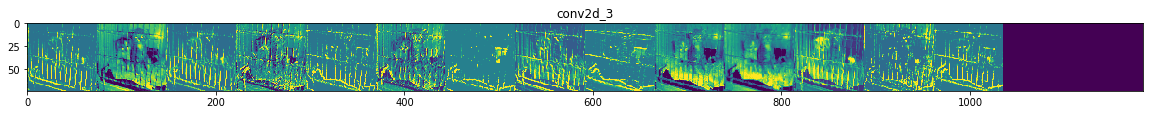

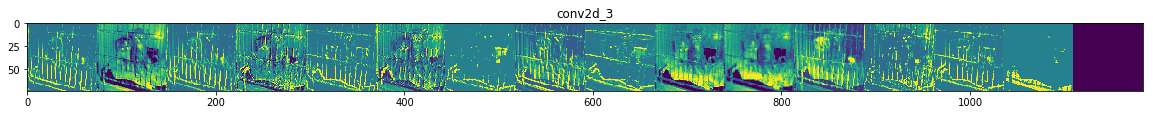

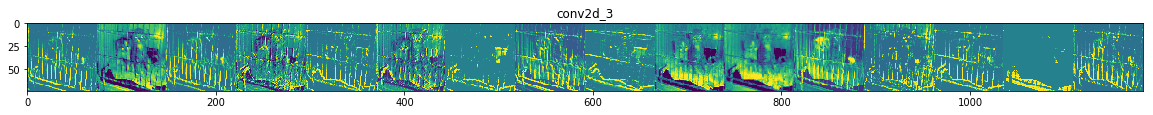

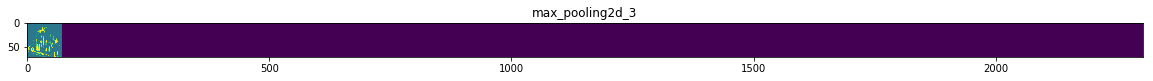

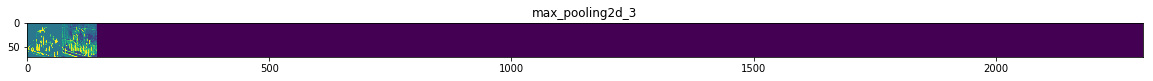

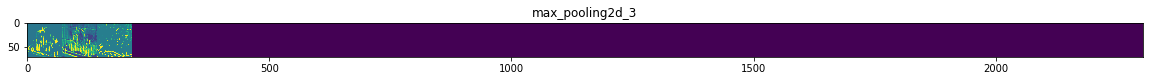

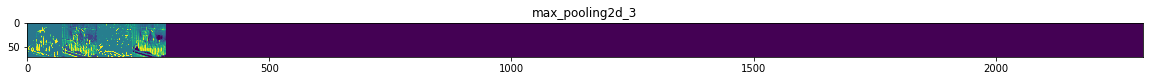

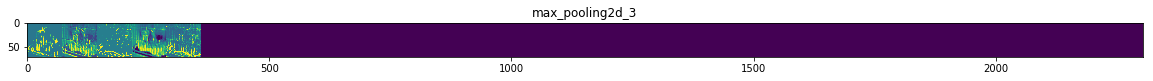

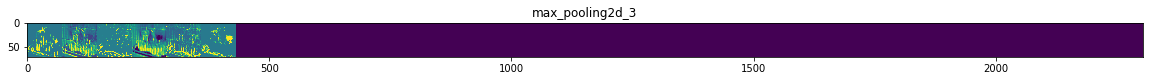

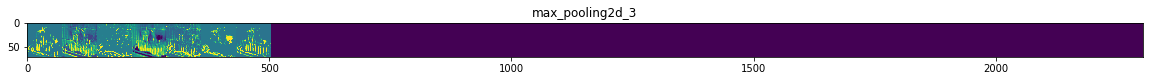

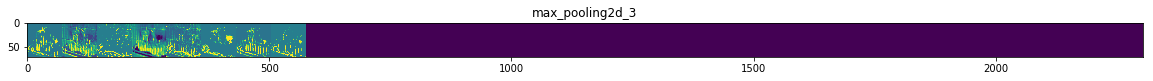

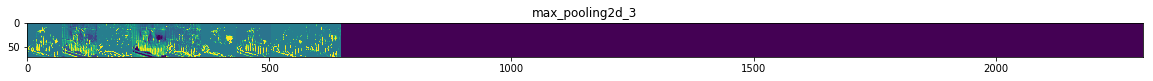

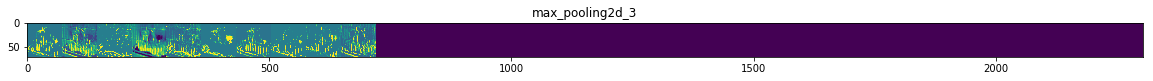

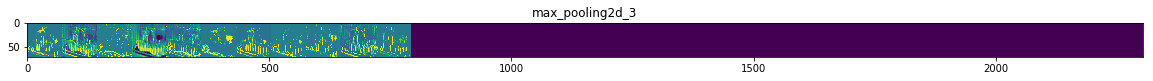

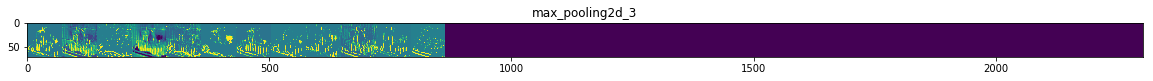

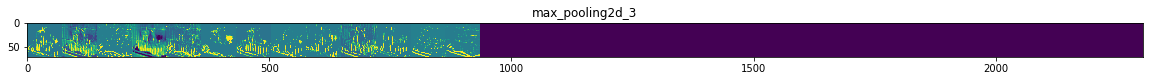

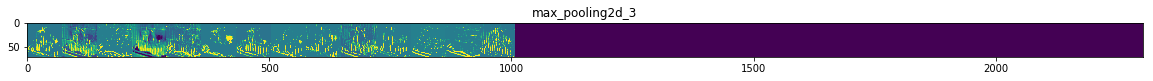

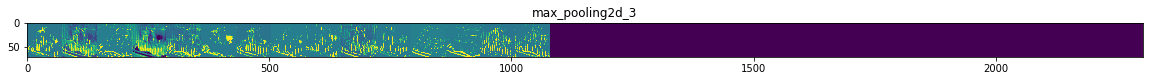

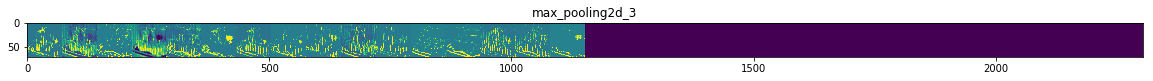

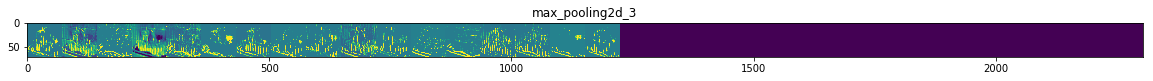

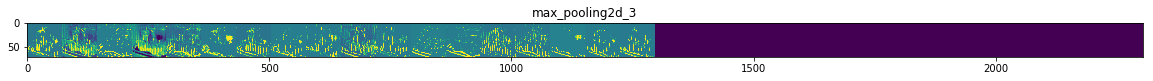

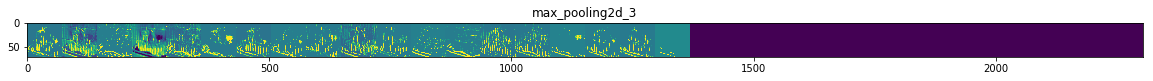

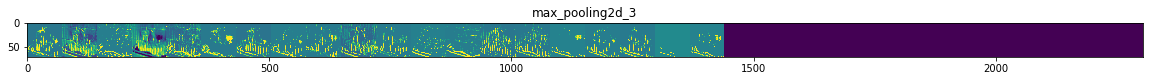

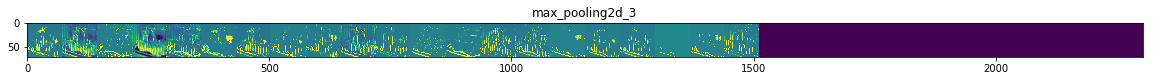

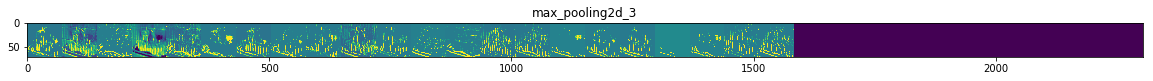

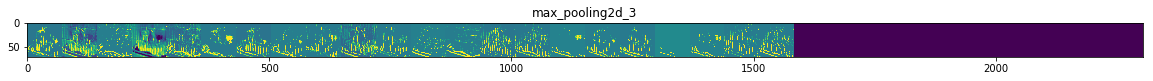

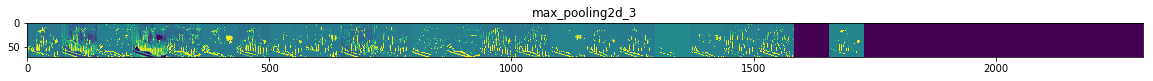

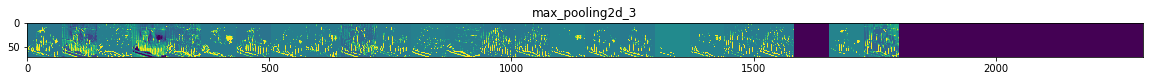

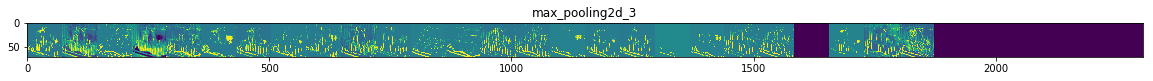

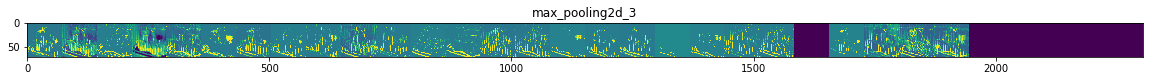

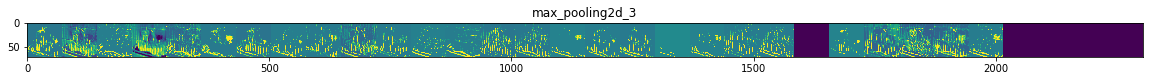

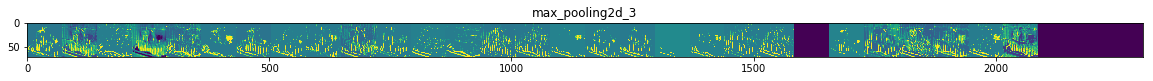

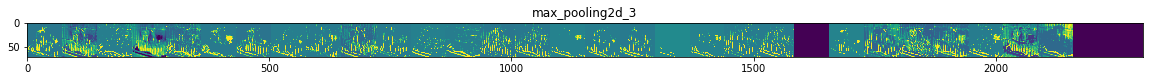

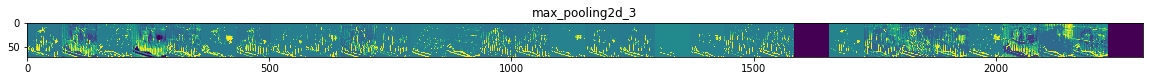

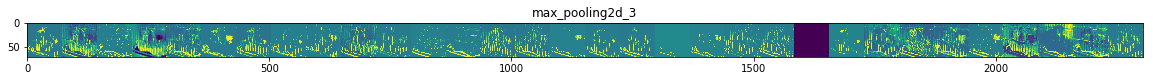

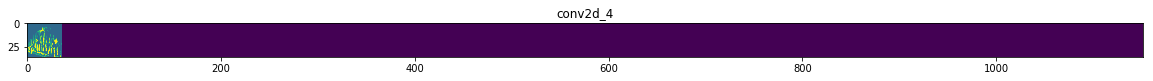

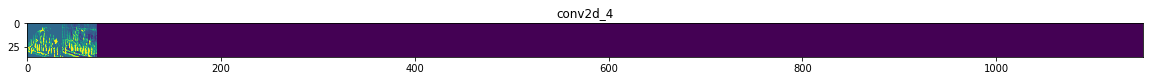

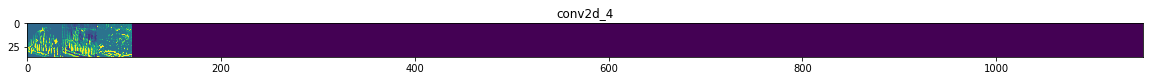

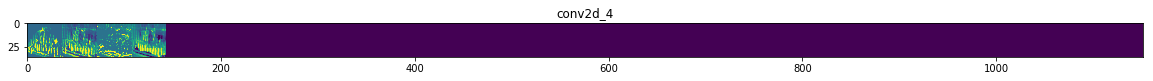

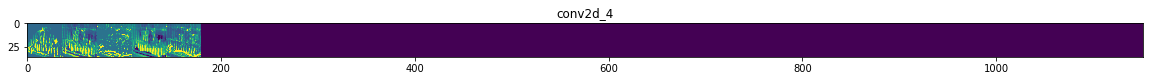

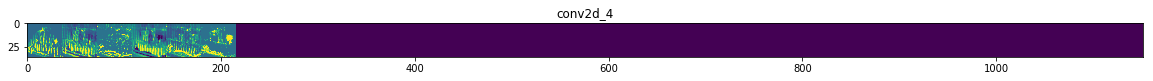

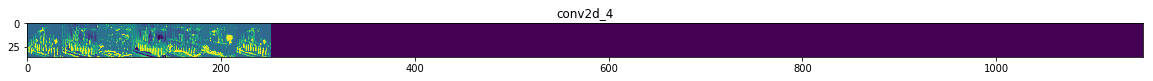

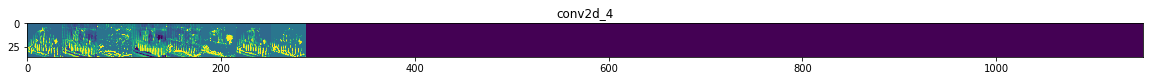

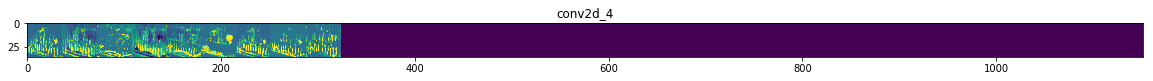

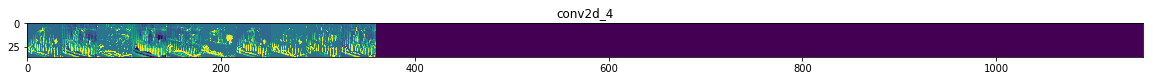

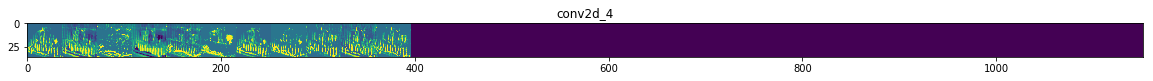

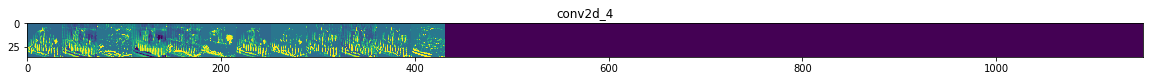

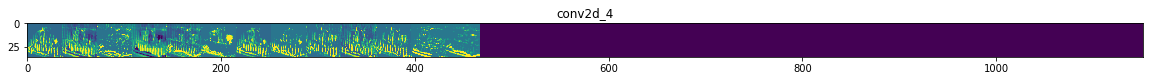

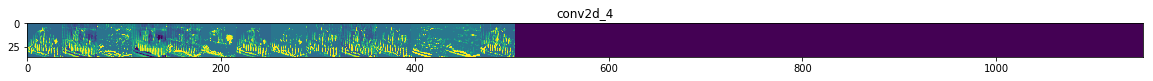

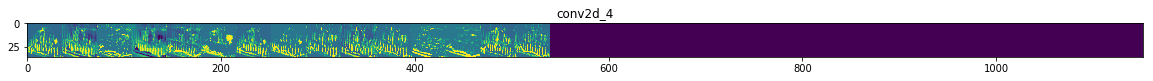

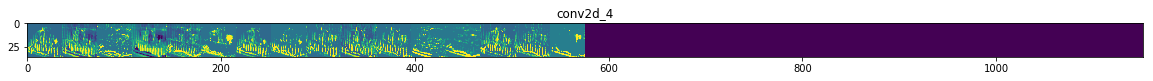

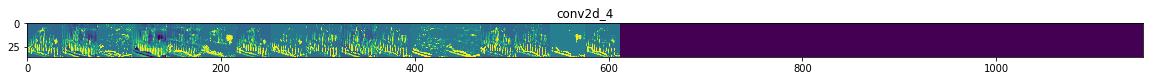

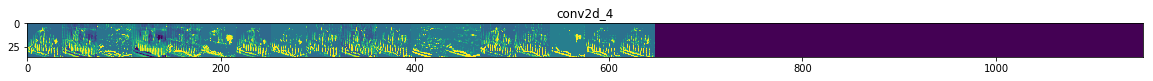

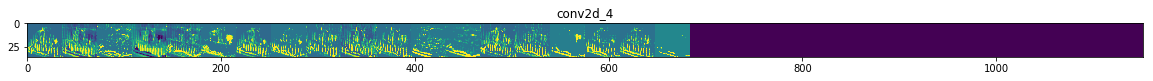

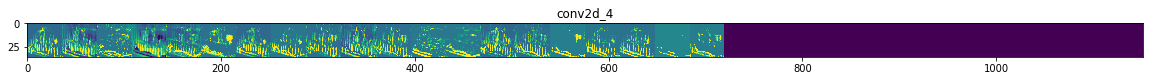

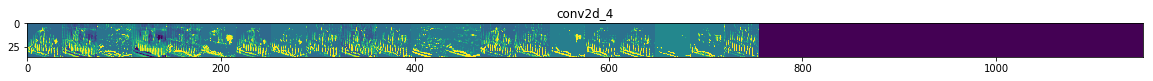

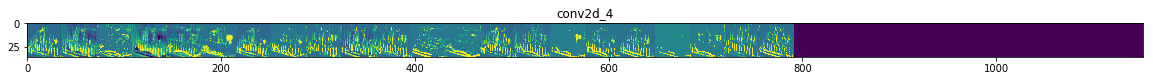

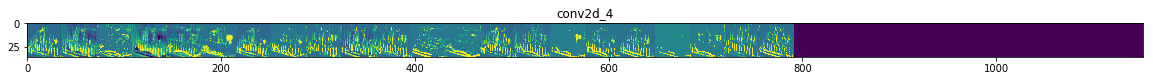

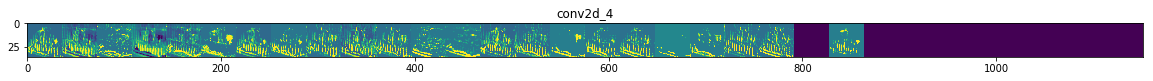

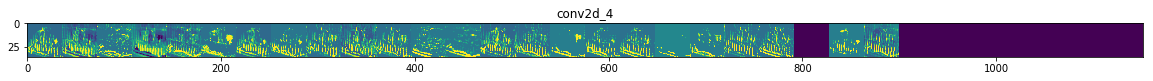

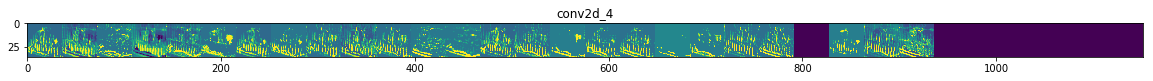

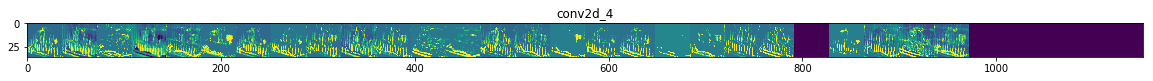

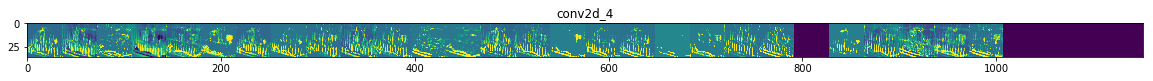

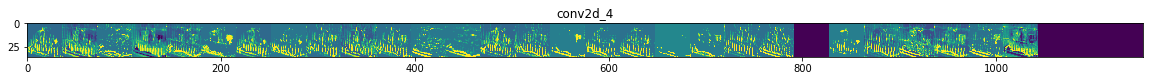

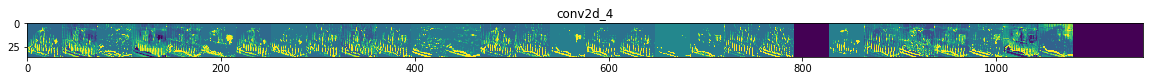

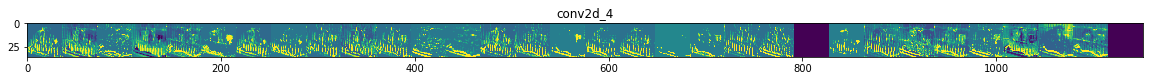

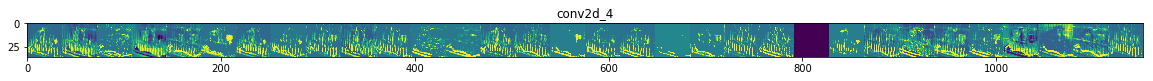

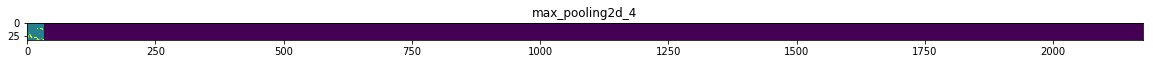

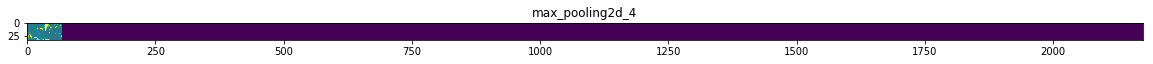

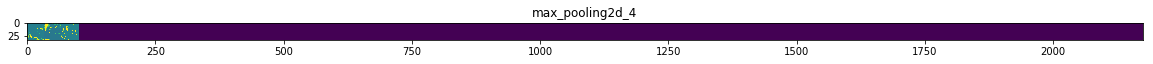

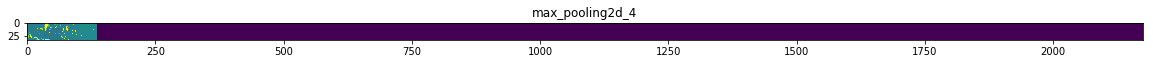

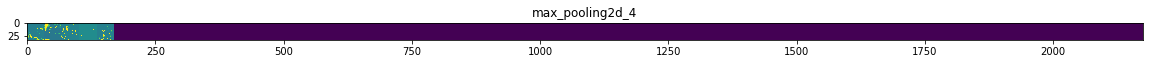

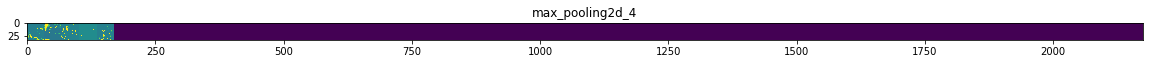

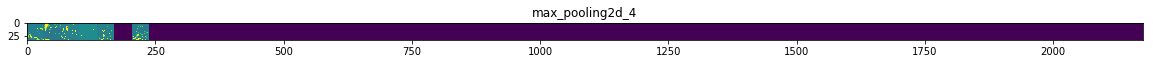

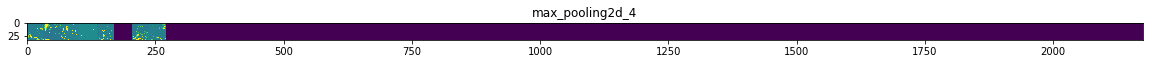

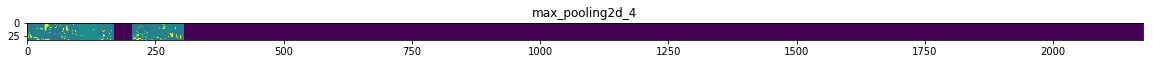

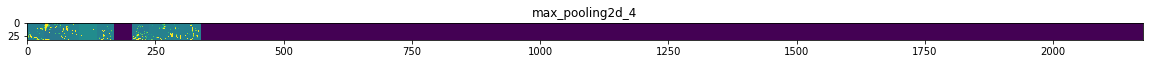

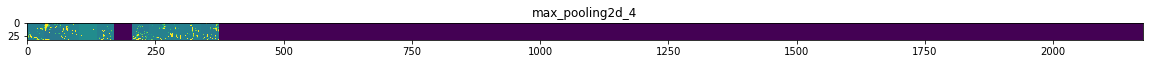

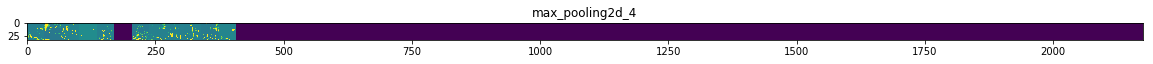

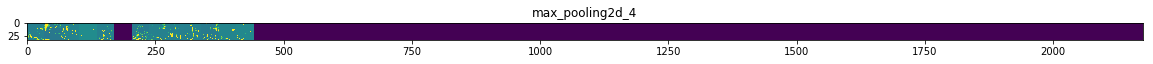

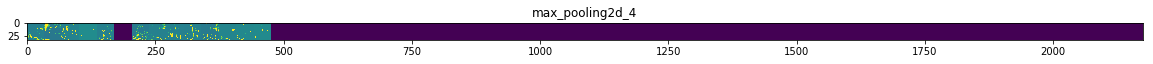

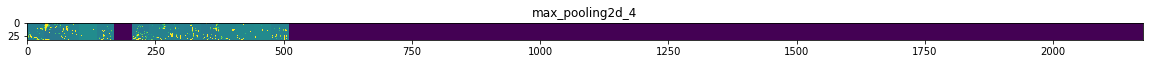

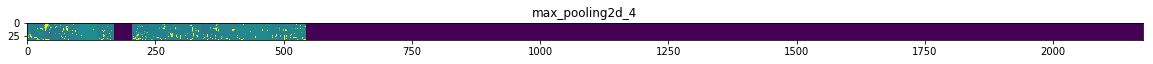

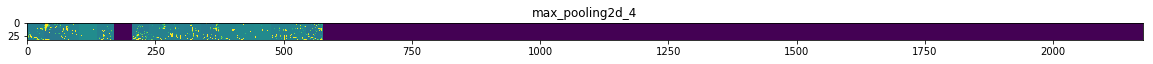

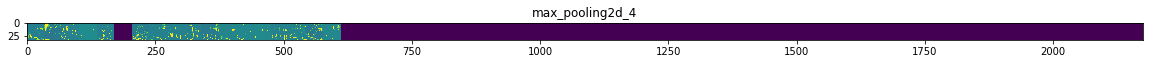

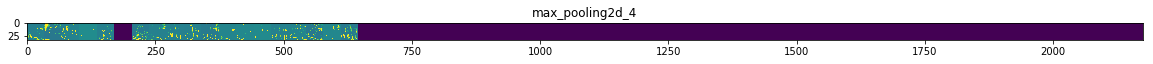

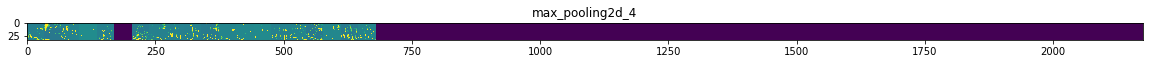

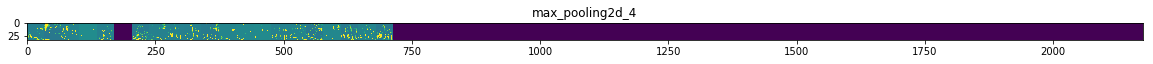

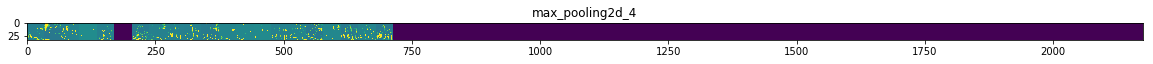

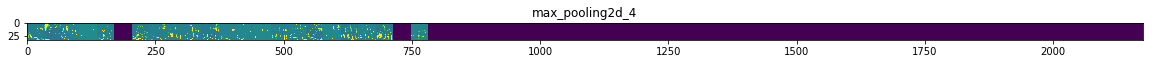

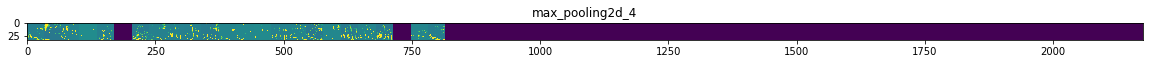

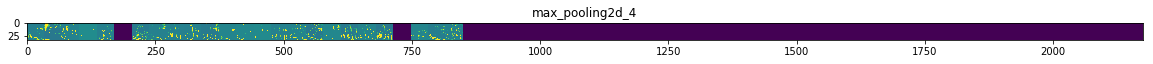

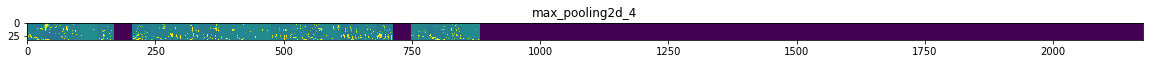

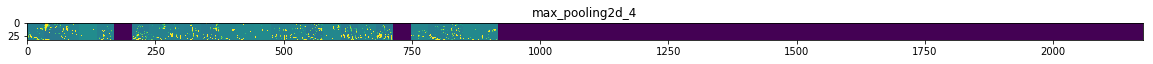

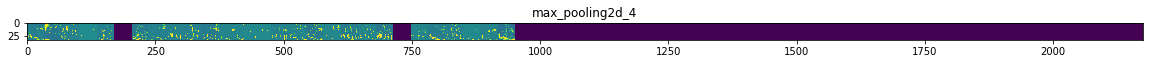

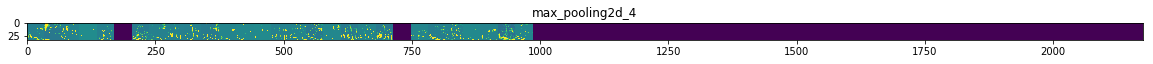

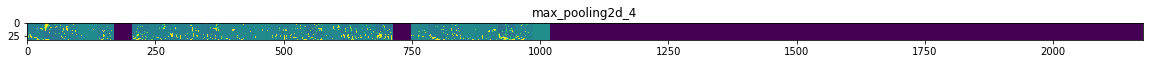

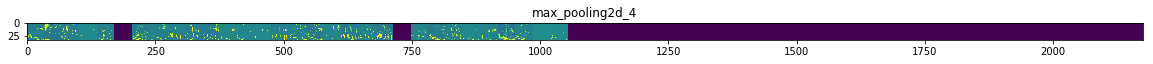

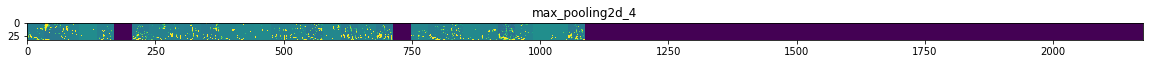

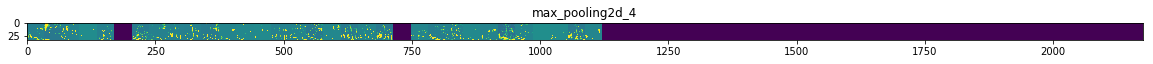

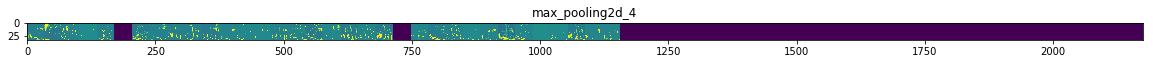

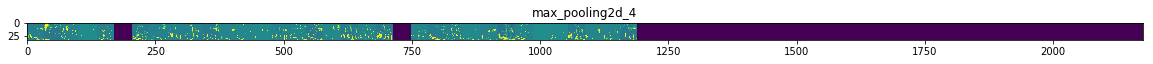

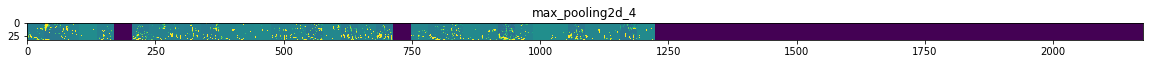

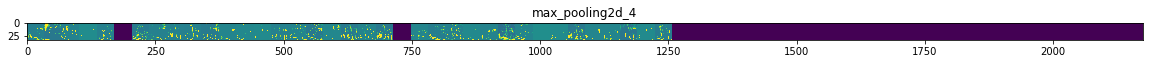

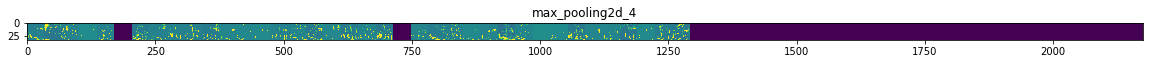

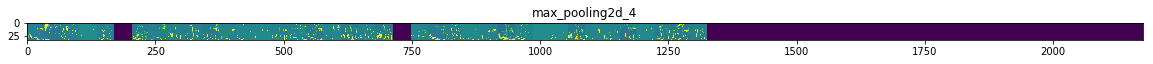

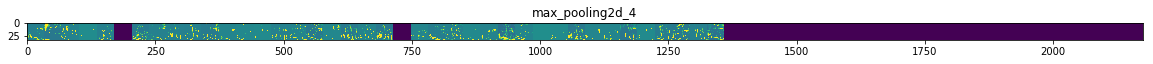

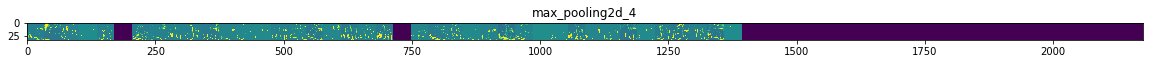

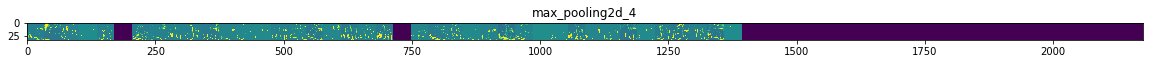

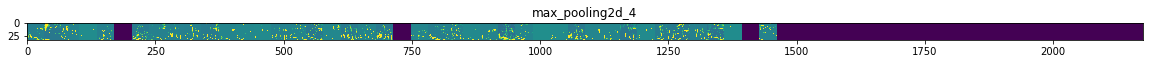

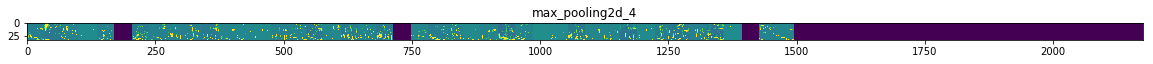

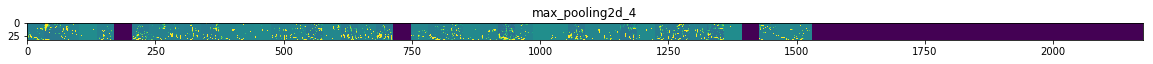

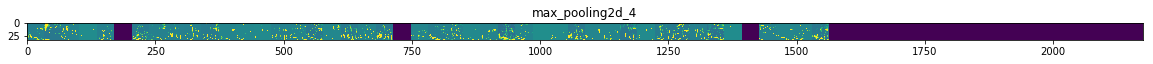

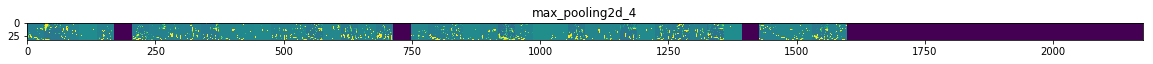

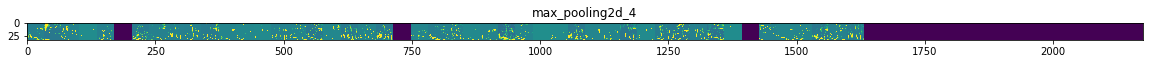

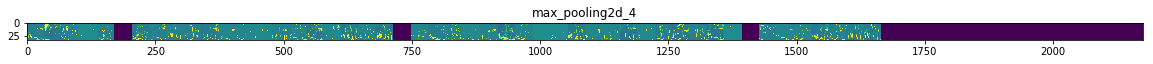

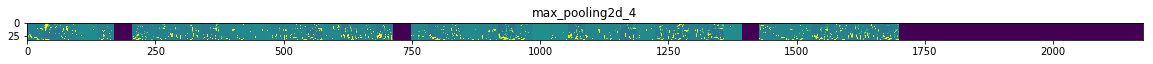

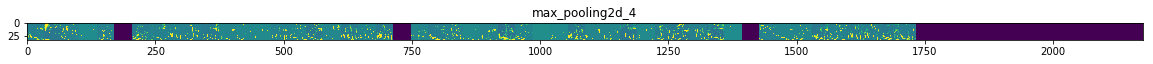

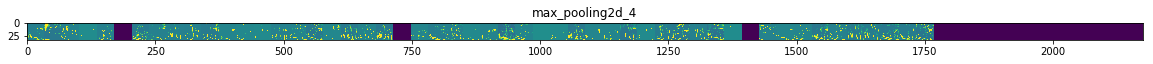

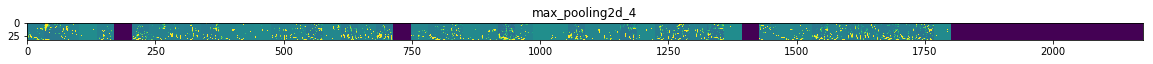

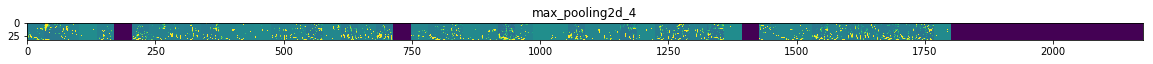

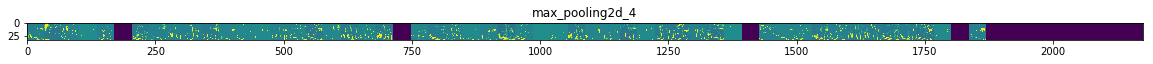

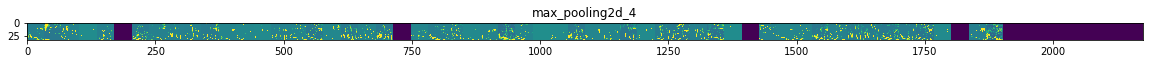

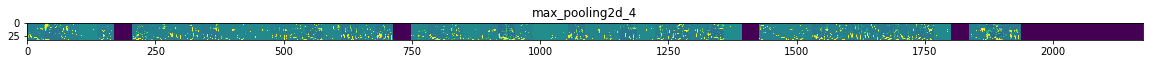

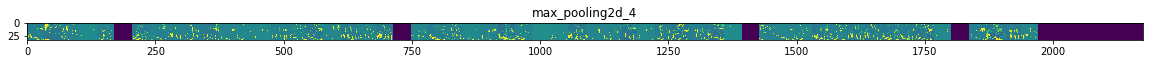

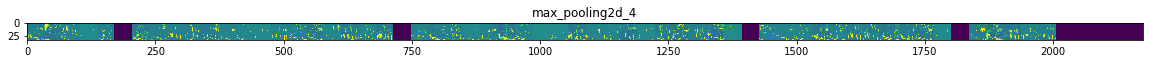

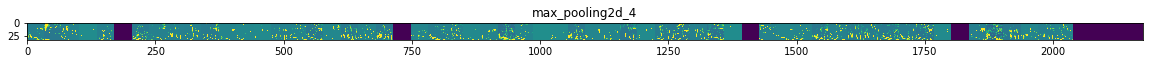

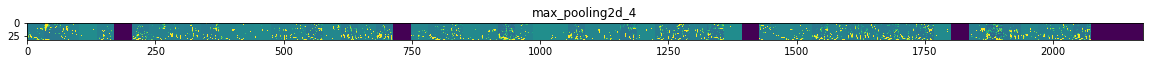

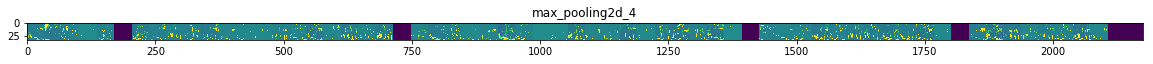

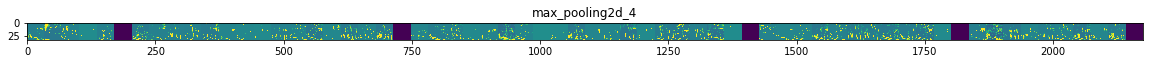

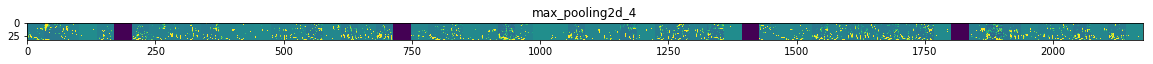

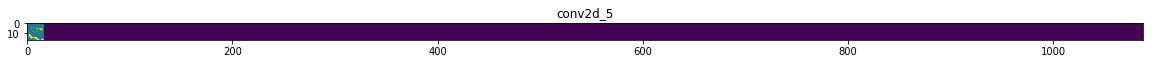

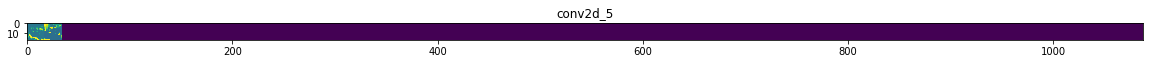

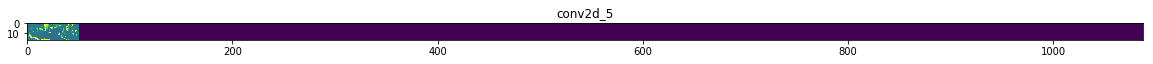

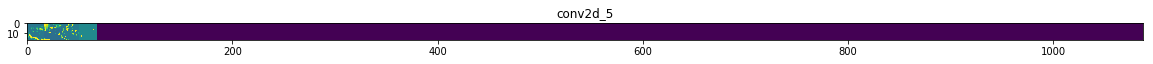

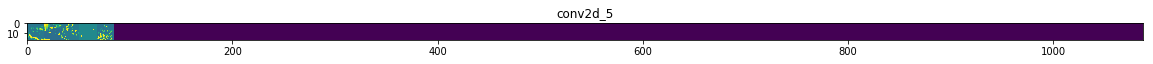

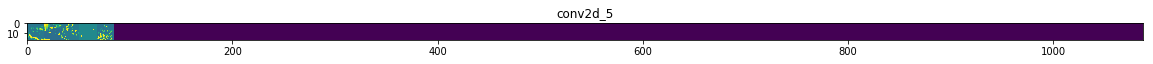

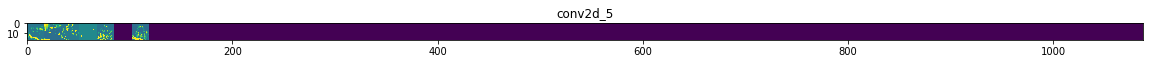

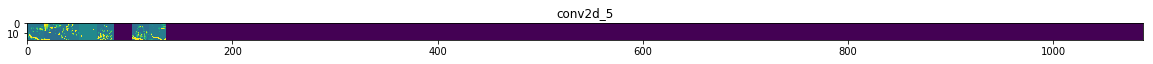

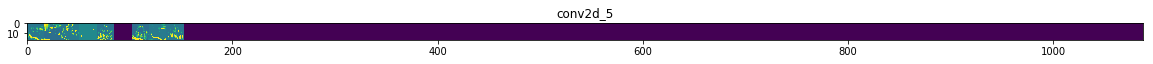

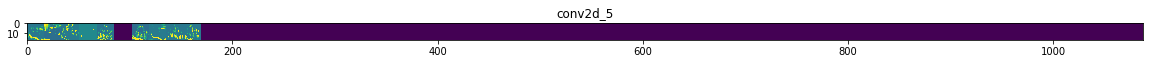

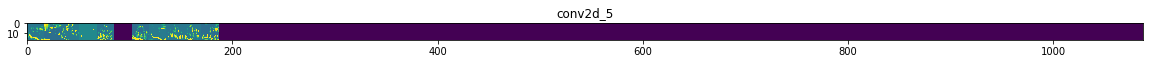

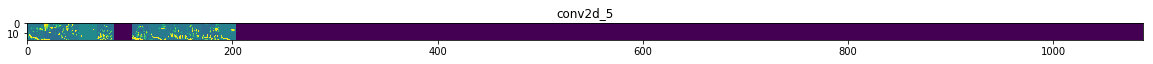

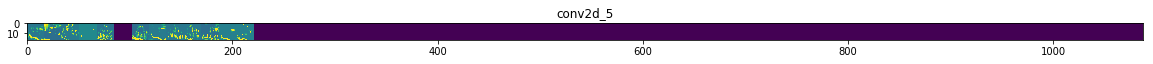

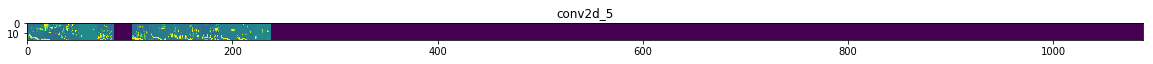

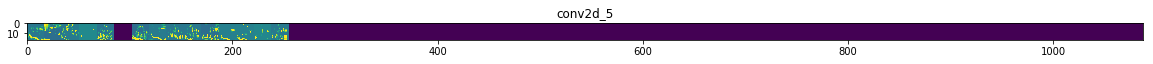

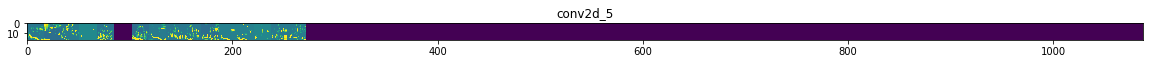

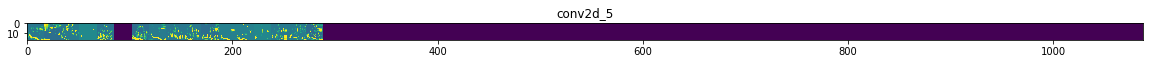

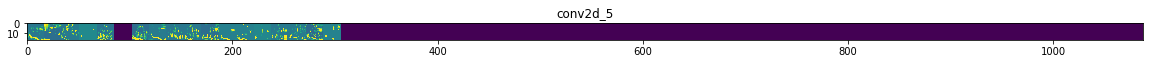

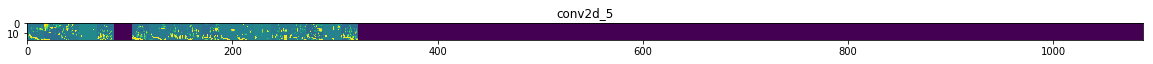

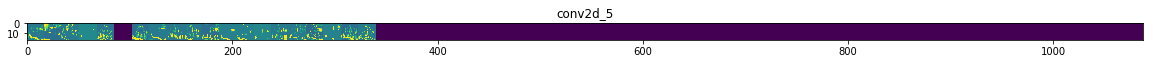

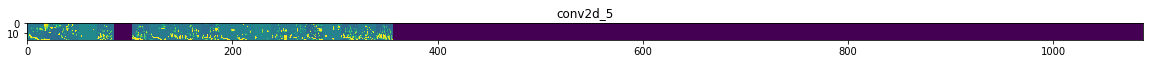

In [ ]:
layer_outputs=[layer.output for layer in model.layers[1:]]
visualization_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
cat_img_files=[train_cat_dir+'/'+f for f in train_cat_frames]
dog_img_files=[train_dog_dir+'/'+f for f in train_dog_frames]
img_paths=random.choice(cat_img_files+dog_img_files)
img=load_img(img_paths,target_size=(150,150))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
x/=255.0
layer_features=visualization_model.predict(x)
layer_names=[layer.name for layer in model.layers]
for layer_name,feature_map in zip(layer_names,layer_features):
    if len(feature_map.shape)==4:
        n_features=feature_map.shape[-1]
        size=feature_map.shape[1]
        display_grid=np.zeros((size,size*n_features))
        for i in range(n_features):
            x=feature_map[0,:,:,i]
            x-=x.mean();
            x/=x.std();
            x*=64
            x+=128
            x=np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size]=x
            scale=20./n_features
            plt.figure(figsize=(scale*n_features,scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid,aspect='auto',cmap='viridis')

In [26]:
def plot(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc))
    plt.plot(epochs,acc)
    plt.plot(epochs,val_acc)
    plt.title('Training accuracy and Validation accuracy')
    plt.figure()
    plt.plot(epochs,loss)
    plt.plot(epochs,val_loss)
    plt.title('Training and validation loss')

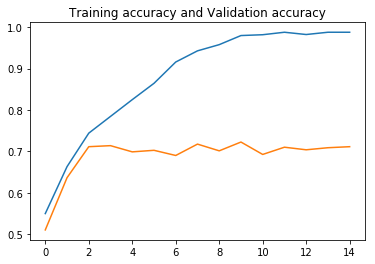

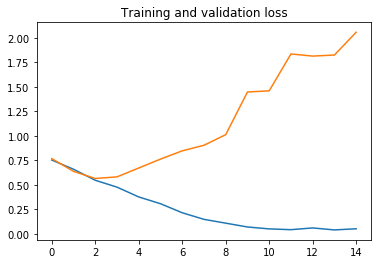

In [27]:
plot(history)

In [21]:
# A clear sign of overfitting

In [39]:
#ImageAugmentation
train_datagen=ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
train_dir,batch_size=16,class_mode='binary',target_size=(150,150))
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=16,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [41]:
model3.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['acc'])

In [42]:
history=model3.fit_generator(train_generator,validation_data=validation_generator,epochs=15,validation_steps=50,verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 50 steps
Epoch 1/15
125/125 - 42s - loss: 0.7102 - acc: 0.5445 - val_loss: 0.6743 - val_acc: 0.5450
Epoch 2/15
125/125 - 42s - loss: 0.6840 - acc: 0.5755 - val_loss: 0.6656 - val_acc: 0.6212
Epoch 3/15
125/125 - 42s - loss: 0.6682 - acc: 0.5905 - val_loss: 0.6262 - val_acc: 0.6475
Epoch 4/15
125/125 - 42s - loss: 0.6414 - acc: 0.6375 - val_loss: 0.6188 - val_acc: 0.6687
Epoch 5/15
125/125 - 48s - loss: 0.6455 - acc: 0.6355 - val_loss: 0.6073 - val_acc: 0.6712
Epoch 6/15
125/125 - 47s - loss: 0.6198 - acc: 0.6605 - val_loss: 0.6162 - val_acc: 0.6650
Epoch 7/15
125/125 - 43s - loss: 0.6233 - acc: 0.6535 - val_loss: 0.6021 - val_acc: 0.6650
Epoch 8/15
125/125 - 49s - loss: 0.5993 - acc: 0.6790 - val_loss: 0.5870 - val_acc: 0.6950
Epoch 9/15
125/125 - 42s - loss: 0.5988 - acc: 0.6865 - val_loss: 0.6316 - val_acc: 0.6300
Epoch 10/15
125/125 - 48s - loss: 0.5937 - acc: 0.6770 - val_loss: 0.5694 - val_acc: 0.7

INFO:tensorflow:Assets written to: model3\assets
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatt

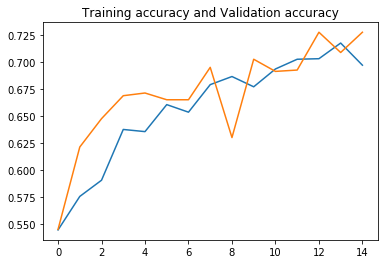

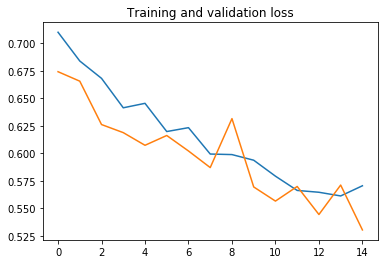

In [43]:
model3.save('model3')
model3.summary()
plot(history)